In [1]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
import pandas as pd 
import plotly.express as px 

churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data['Exited'].value_counts()
#display(churn_data)
fig_9_1 = px.pie(
    values= churn_data, 
    names=['Loyal clients', 'Exited clients'],
    title="TASK 9.1. Ratio of Exited clients and Loyal clients",
    )
fig_9_1.show()
#display(churn_data)
# Выводы: В расматриваемом случае ушедшие клиенты составляют 20,4 %, а лояльные- 79,6% от общего числа клиентов.


In [2]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.
import pandas as pd 
import plotly.express as px 
churn_data = pd.read_csv('data/churn.csv')
customer_balance=churn_data[churn_data['Balance']>2500]
fig_9_2 = px.histogram(
    data_frame=customer_balance,
    x='Balance',
    title="TASK 9.2. Distribution of the balance of users who have more than $2500 in their account", 
    nbins=40,
    height=500,
    width=1000
    ).update_layout(xaxis_title="User balance", 
    yaxis_title="Number of users" )
fig_9_2.show()
# Выводы: В расматриваемом случае наибольшее количество пользователей (898 пользователя) имею на балансе от 120 до 130 тыс $.
# Встречаются выбросы (от 2500 до 50 000 и свяше 190 000) встречаются давально редко. 
# В принципе имеет место нормальное математическое распределение.


In [3]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

import pandas as pd 
import plotly.express as px 
churn_data = pd.read_csv('data/churn.csv')

churn_data["Exited"] = churn_data["Exited"].astype("category") 
churn_data["Exited"]=churn_data["Exited"].cat.rename_categories({1:"exited", 0: "loyal"}) 

fig_9_3=px.box(
    churn_data, 
    title="Task 9.3 Distribution of customer balances in terms of exited indicator",
    x="Balance",  
    y="Exited",  
    orientation="h", 
    width=800,
    height=400, 
    color_discrete_sequence=['red'] ) 
fig_9_3.update_layout(
    xaxis_title_text="Balance of loyal and exited clients' accounts",  
    yaxis_title_text="Types of clients") 
fig_9_3.show()
# Выводы: Мы видим значительное количество (нет "уса" с левой стороны, 1-й квартиль равен минимальному значению) лояльных клиентов с нулемым балансом. 
# При этом медианные значение и 3-я квартиль  суммы на балансе лояльных и ушедших клиентов достаточно близки (92К и 102 К соотвественно).
# Могу предположить, что проценты на остаток по счету клиента не конкурентен с другими банками, 
# т.к. клиенты забирают свои вклады для использования в других сферах.  

In [4]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
churn_data = pd.read_csv('data/churn.csv')

fig_9_4=px.box(
    churn_data, 
    title="Task 9.4. Distribution of age of exited clients", 
    x="Age",
    y="Exited", 
    orientation="h", 
    width=1200,
    color="Exited",
    height=400,
    color_discrete_sequence=['green'] ) 
fig_9_4.update_layout(
    yaxis_title_text="Customer loyalty status (Exited=1 Loyal=0)",
    xaxis_title_text="Groups of clients'age") 
fig_9_4.show()

# Выводы: Больше потенциальных выбросов в группе Лояльных клиентов. 
# Банку следует обратить внимание на возрастную группу от 40 до 50 лет т.к. 
# именно в этой возрастной группе наблюдается наибольший отток клиентов.


In [5]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.
import pandas as pd 
import plotly.express as px 
churn_data = pd.read_csv('data/churn.csv')

churn_data['IsActiveMember'] = churn_data['Exited'].apply(lambda x: 'Non-Active' if x == 0 else 'Active')

fig_9_5=px.ecdf(
        churn_data,
        title="Task 9.5. Dependence of clients' credit rating and their expected salary",
        x="CreditScore",
        y="EstimatedSalary",
        color = 'IsActiveMember')
fig_9_5.update_layout(
    yaxis_title_text="Client's estimated salary",
    xaxis_title_text="Client's credit rating")
fig_9_5.show()
# Выводы: Предполагаемая зарплата ушедших клиетнов несколько выше чем у лояльных, 
# Кредитный рейтинг ушедших клиентов имеет нижнее значение 350, у лояльных не ниже 405

C:\Users\molde\AppData\Local\Temp\ipykernel_46980\1243828109.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



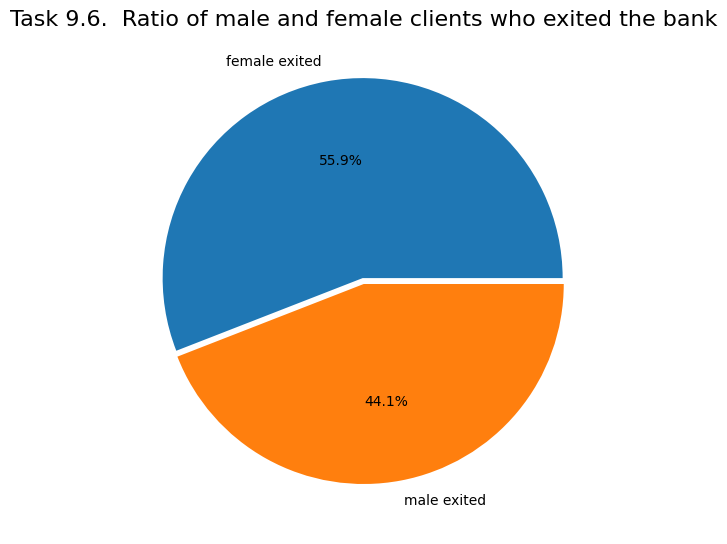

In [6]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
import pandas as pd 
import matplotlib.pyplot as plt 
churn_data = pd.read_csv('data/churn.csv')

fig_9_6 = plt.figure(figsize=(5, 5))
ax_9_6 = fig_9_6.add_axes((1, 1, 1, 1))
pie = ax_9_6.pie(
    churn_data[churn_data.Exited == 1].groupby('Gender')['Exited'].value_counts(),
    labels=('female exited', 'male exited'), 
    autopct='%1.1f%%',
    explode = [0.03, 0])
title = ax_9_6.set_title('Task 9.6.  Ratio of male and female clients who exited the bank', fontsize=16)
fig_9_6.show()
# Выводы: Чаще уходят женщины

In [7]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
import pandas as pd 
import plotly.express as px 
churn_data = pd.read_csv('data/churn.csv')

churn_data["Exited"] = churn_data["Exited"].astype("category") 
churn_data["Exited"]=churn_data["Exited"].cat.rename_categories({1:"exited", 0: "loyal"}) 

fig_9_7 = px.bar( 
    churn_data,
    x="NumOfProducts",
    y="NumOfProducts",
    labels={"NumOfProducts":"Number of products"},
    color="Exited",
    title="Task 9.7. Distribution of clients depending on the number of products",
    width=700,
    orientation="v",
    color_discrete_map={"loyal": "green", "exited": "red"} )
fig_9_7.update_traces(marker_line_width = 0) 
fig_9_7.update_layout(yaxis_title_text="Number of clients") 
fig_9_7.layout["legend"]["title"] = "Types of clients" 
fig_9_7.show()
# Выводы: Лояльные клиенты в большинстве свое имеют до 2-х приобретенных услуг (реже - три), 
# ушедшие клиенты имели до 4 приобретенных услуг.

In [8]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

import pandas as pd 
import plotly.express as px 
churn_data = pd.read_csv('data/churn.csv')

churn_data["IsActiveMember"] = churn_data["IsActiveMember"].astype("category") 
churn_data["IsActiveMember"]=churn_data["IsActiveMember"].cat.rename_categories({1:"Active", 0: "Non-active"}) 
churn_data["IsActiveMember"] = churn_data["IsActiveMember"].astype("str") 
churn_data["Exited"] = churn_data["Exited"].astype("category") 
churn_data["Exited"]=churn_data["Exited"].cat.rename_categories({1:"exited", 0: "loyal"}) 

fig_9_8 = px.bar(
    churn_data, 
    x="Exited", 
    labels={"Exited":"Types of clients"}, 
    color="IsActiveMember", 
    title="Task 9.8. Distribution of active membership in loyal and exited clients group", 
    width=700, 
    orientation="v", 
    color_discrete_map={"Active": "green", "Non-active": "red"} ) 
fig_9_8.update_traces(marker_line_width = 0) 
fig_9_8.update_layout(yaxis_title_text="Number of clients") 
fig_9_8.layout["legend"]["title"] = "Type of clients' membership" 
fig_9_8.show()
# Выводы: Доля неактивных клиентов среди ушедщих значительно выше, чем доля неактивных клиентов среди лояльных. 
# Можно предположить что, что есть вероятность перехода неактивного клиента из статуса ЛОЯЛЬНЫЙ в категорию УШЕДШИЙ. 
# Для уменьшения этой вероятности предлагаю разработать банку дополнительные мероприятия по повышению активности ЛОЯЛЬНЫХ клиентов: выгодные предложения, промо акции и т.д.

In [9]:
#9.9 В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.
import pandas as pd 
import plotly.express as px 
churn_data = pd.read_csv('data/churn.csv')

churn_data=pd.DataFrame(dict(churn_data[churn_data.Exited == 1].Geography.value_counts()*100/churn_data.Geography.value_counts()).items(), columns=['Country', 'ExitedFraction'])

fig_9_9 = px.choropleth(
    data_frame = churn_data,
    locations = 'Country',
    locationmode = 'country names',
    range_color=[0, 35],color= 'ExitedFraction',
    color_continuous_scale="Reds", 
    title = 'Task 9.9. Fraction of exited customers by country', 
    width = 1000, 
    height=800, 
    )
fig_9_9.show()
#Выводы: Наибольшая доля ушедших клиентов наблюдается в Германии (32,44%). 
# Важно отметить что, во Франции и Испании, этот показатель в два раза меньше (16,15% и 16,67% соответственно ). 
# Можно предположить, что такая разница связана либо с активностью "местных" конкурентов в данном секторе, либо общим состоянием экономики и  банковской системы в частности.

<Axes: title={'center': 'Task 9.10.     Heat map of customer churn depending on CreditScoreCat and Tenure '}, xlabel='Number of years of using bank services (Tenure)', ylabel="Client's credit category(CreditScoreCat)">

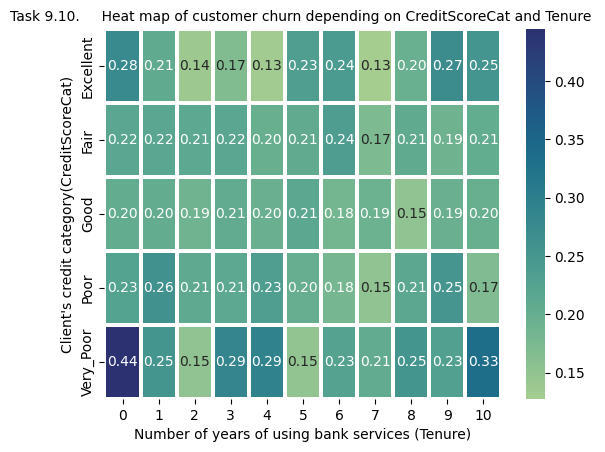

In [10]:
#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), 
# которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

#def get_credit_score_cat(credit_score):
    #if credit_score >= 300 and credit_score < 500:
        #return "Very_Poor"
    #elif credit_score >= 500 and credit_score < 601:
        #return "Poor"
    #elif credit_score >= 601 and credit_score < 661:
        #return "Fair"
    #elif credit_score >= 661 and credit_score < 781:
        #return "Good"
    #elif credit_score >= 781 and credit_score < 851:
        #return "Excellent"
    #elif credit_score >= 851:
        #return "Top"
    #elif credit_score < 300:
        #return "Deep"

#churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)

# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.



import pandas as pd 
import seaborn as sns
churn_data = pd.read_csv('data/churn.csv')

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

churn_data_pivot = churn_data.pivot_table(
    values='Exited',
    aggfunc='mean',
    columns= 'Tenure',
    index = 'CreditScoreCat')

fig_9_10 = sns.heatmap(
    data=churn_data_pivot, 
    cmap='crest',
    annot=True,
    linewidth=1.5,
    fmt=".2f")
fig_9_10.set(
    xlabel="Number of years of using bank services (Tenure)",
    ylabel="Client's credit category(CreditScoreCat)")
fig_9_10.set_title(
    'Task 9.10.     Heat map of customer churn depending on CreditScoreCat and Tenure ',
    fontsize=10);

fig_9_10

#Выводы: Клиенты в категорий "Very_Poor" уходят чаще всего при продолжительности обслуживания в банке до 1 года.